In [ ]:
import pandas as pd
import numpy as np

In [ ]:
raw_csv = pd.read_csv('Shifting_Seas_preprocessed.csv')
df = raw_csv.copy()
df.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,None,Low_to_Medium_Bleaching,High,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,1,0,0,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,0,0,1,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,0,0,1,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,0,1,0,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,1,0,0,110,0


# Scaling the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling only selected columns to boost model accuracy
columns_to_scale = ['SST (°C)', 'pH Level', 'Species Observed', 'Latitude', 'Longitude', 'Year', 'Month']
scaler = MinMaxScaler()

In [ ]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
#updating the dataset with the scaled data

In [ ]:
df.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,None,Low_to_Medium_Bleaching,High,Species Observed,Marine Heatwave
0,0.0,0.0,0,0,1,0.997476,0.639809,0.609195,0.727554,1,0,0,0.444444,0
1,0.0,0.0,1,0,0,0.002187,0.999839,0.628004,0.408669,0,0,1,0.529915,0
2,0.0,0.0,1,0,0,0.866376,0.265840,0.545455,0.232198,0,0,1,0.307692,0
3,0.0,0.0,1,0,0,0.001761,0.999412,0.556949,0.380805,0,1,0,0.341880,0
4,0.0,0.0,0,1,0,0.454551,0.213282,0.518286,0.325077,1,0,0,0.478632,0


# Balancing the dataset using resample module

In [ ]:
#upsampling the dataset as the bleaching values are outbalanced.

from sklearn.utils import resample

# Step 1: Create a label column if needed
# (assuming 'None', 'Low_to_Medium_Bleaching', 'High' are mutually exclusive one-hot)
df['label'] = df[['None', 'Low_to_Medium_Bleaching', 'High']].idxmax(axis=1)

# Step 2: Split the data
df_none = df[df['label'] == 'None']
df_low_medium = df[df['label'] == 'Low_to_Medium_Bleaching']
df_high = df[df['label'] == 'High']

In [ ]:
# Step 3: Find the maximum class size
max_size = max(len(df_none), len(df_low_medium), len(df_high))

In [ ]:
# Step 4: Upsample minority classes
df_none_upsampled = resample(df_none, replace=True, n_samples=max_size, random_state=42)
df_low_medium_upsampled = resample(df_low_medium, replace=True, n_samples=max_size, random_state=42)
df_high_upsampled = resample(df_high, replace=True, n_samples=max_size, random_state=42)

In [ ]:
# Step 5: Combine them back
df_upsampled = pd.concat([df_none_upsampled, df_low_medium_upsampled, df_high_upsampled])

In [ ]:
# Shuffle the final dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_upsampled.shape

(786, 15)

In [ ]:
df_upsampled

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,None,Low_to_Medium_Bleaching,High,Species Observed,Marine Heatwave,label
0,0.750,0.363636,1,0,0,0.560654,0.754495,0.410658,0.637771,0,0,1,0.547009,0,High
1,0.375,0.545455,1,0,0,0.867999,0.265987,0.356322,0.634675,1,0,0,0.683761,0,None
2,1.000,0.363636,0,0,1,0.997380,0.639970,0.410658,0.523220,1,0,0,0.495726,0,None
3,0.000,0.818182,0,0,1,0.997572,0.640019,0.657262,0.563467,1,0,0,0.393162,0,None
4,0.125,0.909091,0,1,0,0.450305,0.213051,0.515152,0.588235,1,0,0,0.435897,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0.875,0.545455,1,0,0,0.002392,0.999689,0.339603,0.408669,1,0,0,0.803419,0,None
782,0.750,0.181818,1,0,0,0.737792,0.891811,0.623824,0.578947,1,0,0,0.341880,0,None
783,0.375,0.090909,1,0,0,0.002262,0.999447,0.291536,0.566563,0,1,0,0.735043,0,Low_to_Medium_Bleaching
784,0.750,0.545455,0,1,0,0.994725,0.000265,0.729363,0.405573,0,1,0,0.384615,1,Low_to_Medium_Bleaching


# Random Forest with Grid Search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Combine the one-hot columns into a single label column
df_upsampled['Bleaching severity'] = df_upsampled[['None', 'Low_to_Medium_Bleaching', 'High']].idxmax(axis=1)


In [ ]:
df_upsampled = df_upsampled.drop(columns=['None', 'Low_to_Medium_Bleaching', 'High'])


In [ ]:
df_upsampled = df_upsampled.drop(['label'],axis=1)

In [ ]:
X = df_upsampled.drop(columns=['Bleaching severity'])

# Target
y = df_upsampled['Bleaching severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8227848101265823
Confusion matrix:
 [[44  3  5]
 [ 3 40 10]
 [ 6  1 46]]
Classification report:
                          precision    recall  f1-score   support

                   High       0.83      0.85      0.84        52
Low_to_Medium_Bleaching       0.91      0.75      0.82        53
                   None       0.75      0.87      0.81        53

               accuracy                           0.82       158
              macro avg       0.83      0.82      0.82       158
           weighted avg       0.83      0.82      0.82       158



# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # 5 is a common choice for k
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.6139
Confusion Matrix:
[[41  8  3]
 [15 25 13]
 [12 10 31]]


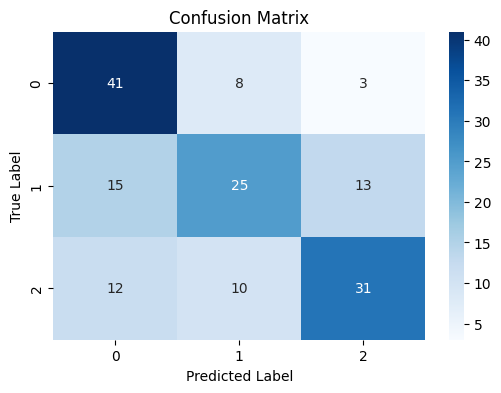

Classification Report:
                         precision    recall  f1-score   support

                   High       0.60      0.79      0.68        52
Low_to_Medium_Bleaching       0.58      0.47      0.52        53
                   None       0.66      0.58      0.62        53

               accuracy                           0.61       158
              macro avg       0.61      0.62      0.61       158
           weighted avg       0.61      0.61      0.61       158



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)